In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv("F:/Credit Card Default Prediction1/notebooks/Final_df.csv")

In [36]:
df.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,2,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,3,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,4,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [37]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

### `Preparing X and Y variables`

In [38]:
X = df.drop(['IsDefaulter'],axis=1)
y = df['IsDefaulter']

In [39]:
X.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [40]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [41]:
X = preprocessor.fit_transform(X)

In [42]:
X.shape

(46728, 83)

In [43]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)
X_train.shape, X_test.shape

((23364, 83), (23364, 83))

#### Create an Evaluate Function to give all metrics after model Training

In [44]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
from sklearn import svm

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "Random Forest Regressor": RandomForestRegressor(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: -0.0001


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1549
- Mean Absolute Error: 0.0589
- R2 Score: 0.9040
----------------------

### Results

In [48]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
4,Decision Tree,1.000000
5,DecisionTreeClassifier,1.000000
6,Random Forest Regressor,1.000000
7,RandomForestClassifier,1.000000
10,AdaBoost Regressor,1.000000
8,XGBRegressor,1.000000
2,Ridge,1.000000
9,CatBoosting Regressor,0.999993
3,K-Neighbors Regressor,0.851179


## Linear Regression

In [49]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

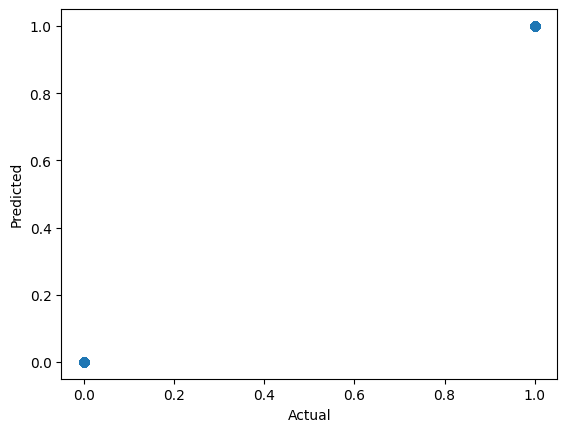

In [50]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

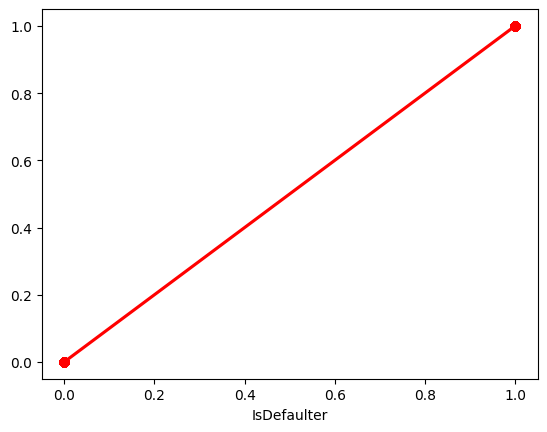

In [51]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');